## レポート課題12

## 課題1

講義資料のプログラムを参考に，重積分$\displaystyle{\int_1^2 \int_{2-x}^{x^2}(8x^2+4y)dydx \:\: (=54)}$ を計算するためのプログラムをシンプソン則を用いて作成しなさい（パッケージを使わず，自分でアルゴリズムを書くこと）．

In [13]:
import numpy as np

# シンプソン則を用いた二重積分の関数
def simpson_double_integral(a, b, m, n, lower, upper, f):
    h_x = (b - a) / n  # x方向の分割幅
    simpson_sum = 0.0  # シンプソン則の積分結果を格納する変数

    # x方向のシンプソン則の計算
    for i in range(n + 1):
        x = a + i * h_x  # xの現在の値
        h_y = (upper(x) - lower(x)) / m  # y方向の分割幅
        inner_sum = 0.0  # y方向の積分結果を格納する変数

        # y方向のシンプソン則の計算
        for j in range(m + 1):
            y = lower(x) + j * h_y  # yの現在の値
            # シンプソン則の係数
            coeff_y = 4 if j % 2 != 0 else 2 if j != 0 and j != m else 1
            inner_sum += coeff_y * f(x, y)  # y方向の積分結果を加算

        inner_sum *= h_y / 3  # y方向のシンプソン則の計算結果を反映
        # シンプソン則の係数
        coeff_x = 4 if i % 2 != 0 else 2 if i != 0 and i != n else 1
        simpson_sum += coeff_x * inner_sum  # x方向の積分結果を加算

    simpson_sum *= h_x / 3  # x方向のシンプソン則の計算結果を反映
    return simpson_sum

# 被積分関数
def func(x, y):
    return 8 * x**2 + 4 * y

# yの上限
def upper(x):
    return x**2

# yの下限
def lower(x):
    return 2 - x

# メイン部分
if __name__ == '__main__':
    a = 1  # xの下限
    b = 2  # xの上限
    m = 1000  # y方向の分割数
    n = 1000  # x方向の分割数
    result = simpson_double_integral(a, b, m, n, lower, upper, func)  # シンプソン則による二重積分の計算
    print("分割数は({}, {})\n積分値は{}".format(n, m, result))  # 結果を出力


分割数は(1000, 1000)
積分値は54.00000000000131


## 課題2

以下の図は，定積分$\displaystyle{\int_{0}^{1}\frac{1}{1+x} dx \:\: (=\log2)}$ を台形則（および Runge-Kutta 法）によって数値計算した際に，分割数 $n$（図表では $N$ で表示）に応じて誤差の値（真の値と計算結果の差）が変わる様子をプロットしたものである．台形則と Simpson 則の2つに対する同様の結果を作成し，`matplotlib` モジュールを用いて下図と同様に図示せよ．特に，グラフの横軸と縦軸をともに対数目盛りとして表示すること．

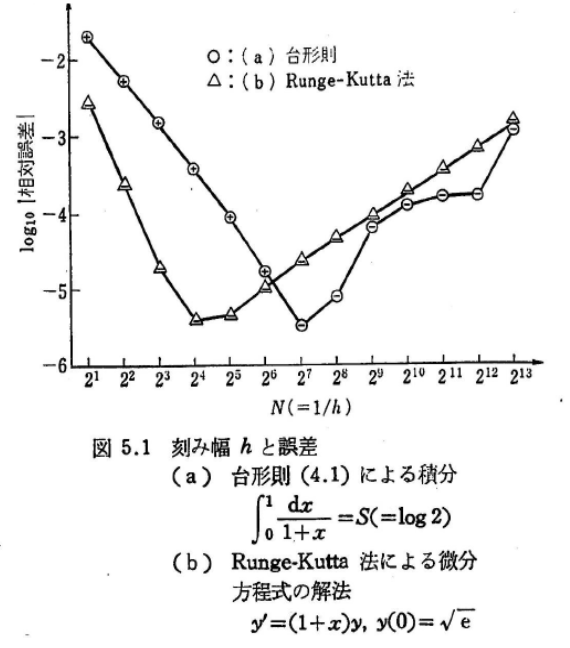
(出所：伊理・藤野，数値計算の常識，共立出版，1985.)

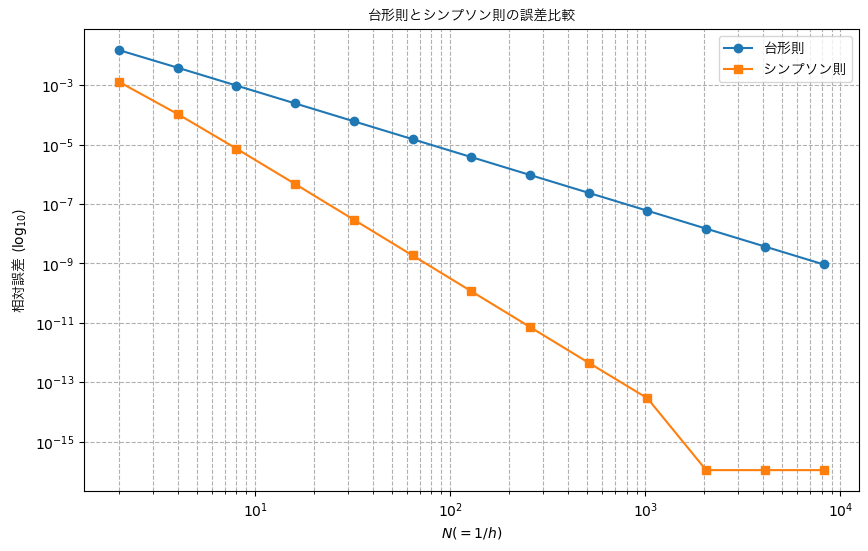

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import math

# 日本語フォントの設定
font_path = '/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc'
font_prop = fm.FontProperties(fname=font_path)

# 台形則
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    result = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        result += f(a + i * h)
    result *= h
    return result

# シンプソン則
def simpson_rule(f, a, b, n):
    if n % 2 == 1:
        n += 1  # nを偶数にする
    h = (b - a) / n
    result = f(a) + f(b)
    for i in range(1, n, 2):
        result += 4 * f(a + i * h)
    for i in range(2, n, 2):
        result += 2 * f(a + i * h)
    result *= h / 3
    return result

# 被積分関数
def integrand(x):
    return 1 / (1 + x)

# 真の値
true_value = math.log(2)

# 分割数のリスト
N_values = [2**i for i in range(1, 14)]

# 誤差を格納するリスト
errors_trapezoidal = []
errors_simpson = []

# 各分割数に対する誤差の計算
for n in N_values:
    approx_trap = trapezoidal_rule(integrand, 0, 1, n)
    approx_simp = simpson_rule(integrand, 0, 1, n)
    errors_trapezoidal.append(abs(true_value - approx_trap))
    errors_simpson.append(abs(true_value - approx_simp))

# プロット
plt.figure(figsize=(10, 6))
plt.loglog(N_values, errors_trapezoidal, 'o-', label='台形則')
plt.loglog(N_values, errors_simpson, 's-', label='シンプソン則')
plt.xlabel('$N (=1/h)$', fontproperties=font_prop)
plt.ylabel('相対誤差 ($\log_{10}$)', fontproperties=font_prop)  
plt.legend(prop=font_prop)
plt.grid(True, which="both", ls="--")
plt.title('台形則とシンプソン則の誤差比較', fontproperties=font_prop) 
plt.show()


##########################################################################################

レポート課題に取り組み，プログラムと結果を .ipynb 形式のファイルに保存して CoursePower から提出しなさい． 

提出ファイル名：CBReport12_学籍番号_英字氏名.ipynb

 例えば，学籍番号12345678の青山太郎の場合は，CBReport12_12345678_AoyamaTaro.ipynb　というファイル名で提出する．
